In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.datasets import load_boston

# Understand the data

### Load boston dataset

In [8]:
boston = load_boston()

### Understand the data

In [18]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [27]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['Price'] = boston.target
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<function matplotlib.pyplot.show>

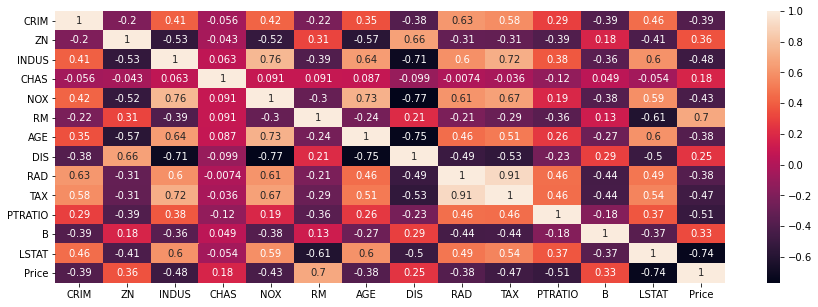

In [28]:
correlation_map = data.corr()
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(correlation_map,annot = True)
plt.show

### Select the most important correlations

In [34]:
features=[]
values=[]
for i, index in enumerate(correlation_map['Price'].index):
    if abs(correlation_map['Price'][index])> 0.5:
        features.append(index)
        values.append(correlation_map['Price'][index])
        
df = pd.DataFrame(data = values, index = features, columns=['Correlated Values'])
df

,Correlated Values
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [37]:
correlated_data = data[df.index]
correlated_data

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2
...,...,...,...,...
501,6.593,21.0,9.67,22.4
502,6.120,21.0,9.08,20.6
503,6.976,21.0,5.64,23.9
504,6.794,21.0,6.48,22.0


####The heatmap of the most important correlations

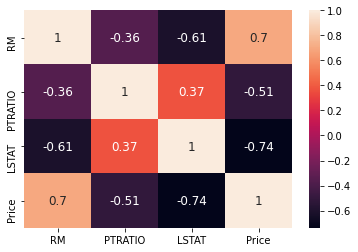

In [38]:
sns.heatmap(correlated_data.corr(), annot=True, annot_kws={'size': 12},linewidth =0)
plt.show()

### Splitting the data for the model